In [1]:
# As usual, a bit of setup
from __future__ import print_function
import time
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.fc_net import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

=========== You can safely ignore the message below if you are NOT working on ConvolutionalNetworks.ipynb ===========
	You will need to compile a Cython extension for a portion of this assignment.
	The instructions to do this will be given in a section of the notebook below.
	There will be an option for Colab users and another for Jupyter (local) users.


In [2]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in list(data.items()):
  print(('%s: ' % k, v.shape))

('X_train: ', (49000, 3, 32, 32))
('y_train: ', (49000,))
('X_val: ', (1000, 3, 32, 32))
('y_val: ', (1000,))
('X_test: ', (1000, 3, 32, 32))
('y_test: ', (1000,))


# Train a good model!
Train the best fully-connected model that you can on CIFAR-10, storing your best model in the `best_model` variable. We require you to get at least 50% accuracy on the validation set using a fully-connected net.

If you are careful it should be possible to get accuracies above 55%, but we don't require it for this part and won't assign extra credit for doing so. Later in the assignment we will ask you to train the best convolutional network that you can on CIFAR-10, and we would prefer that you spend your effort working on convolutional nets rather than fully-connected nets.

You might find it useful to complete the `BatchNormalization.ipynb` and `Dropout.ipynb` notebooks before completing this part, since those techniques can help you train powerful models.

In [3]:
# use 1000 training samples as toy data
num_train = 1000
small_data = {
    'X_train': data['X_train'][:num_train],
    'y_train': data['y_train'][:num_train],
    'X_val': data['X_val'],
    'y_val': data['y_val'],
}
for k, v in small_data.items():
    print(k, v.shape)

X_train (1000, 3, 32, 32)
y_train (1000,)
X_val (1000, 3, 32, 32)
y_val (1000,)


In [4]:
hidden_dims = [700] * 3
model = FullyConnectedNet(hidden_dims, input_dim=3*32*32, num_classes=10,
                          normalization='batchnorm', dropout=0.5, dtype=np.float64,
                          reg=5e-7)
solver = Solver(model, data, update_rule='adam', batch_size=100,
                num_epochs=20, optim_config= {'learning_rate':5e-3},
                print_every=500, verbose=True, lr_decay=0.95)
%time solver.train()

(Iteration 1 / 9800) loss: 2.309993
(Epoch 0 / 20) train acc: 0.131000; val_acc: 0.152000
(Epoch 1 / 20) train acc: 0.455000; val_acc: 0.465000
(Iteration 501 / 9800) loss: 1.672701
(Epoch 2 / 20) train acc: 0.500000; val_acc: 0.468000
(Iteration 1001 / 9800) loss: 1.463933
(Epoch 3 / 20) train acc: 0.511000; val_acc: 0.508000
(Iteration 1501 / 9800) loss: 1.431047
(Epoch 4 / 20) train acc: 0.512000; val_acc: 0.494000
(Iteration 2001 / 9800) loss: 1.680060
(Epoch 5 / 20) train acc: 0.524000; val_acc: 0.523000
(Iteration 2501 / 9800) loss: 1.522827
(Epoch 6 / 20) train acc: 0.564000; val_acc: 0.526000
(Iteration 3001 / 9800) loss: 1.314917
(Epoch 7 / 20) train acc: 0.569000; val_acc: 0.525000
(Iteration 3501 / 9800) loss: 1.246932
(Epoch 8 / 20) train acc: 0.589000; val_acc: 0.544000
(Iteration 4001 / 9800) loss: 1.313336
(Epoch 9 / 20) train acc: 0.638000; val_acc: 0.548000
(Iteration 4501 / 9800) loss: 0.970323
(Epoch 10 / 20) train acc: 0.596000; val_acc: 0.561000
(Iteration 5001 / 9

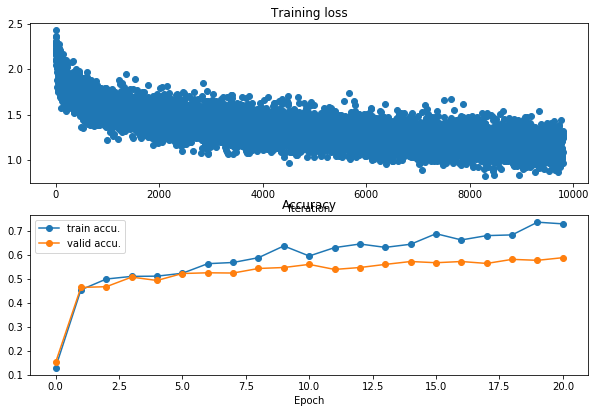

In [5]:
# plots
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')
plt.plot(solver.loss_history, 'o', label='train loss')

plt.subplot(3, 1, 2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.plot(solver.train_acc_history, '-o', label='train accu.')
plt.plot(solver.val_acc_history, '-o', label='valid accu.')
plt.legend()
plt.show()

In [6]:
best_model = model
y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
y_val_pred = np.argmax(best_model.loss(data['X_val']), axis=1)
print('Validation set accuracy: ', (y_val_pred == data['y_val']).mean())
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Validation set accuracy:  0.589
Test set accuracy:  0.6


In [7]:
for k, v in model.params.items():
    print(k, v.shape)

W1 (3072, 700)
b1 (700,)
gamma1 (700,)
beta1 (700,)
W2 (700, 700)
b2 (700,)
gamma2 (700,)
beta2 (700,)
W3 (700, 700)
b3 (700,)
gamma3 (700,)
beta3 (700,)
W4 (700, 10)
b4 (10,)
